In [61]:
import pandas as pd
import seaborn as sns
from LinearRegression import Neuron
import numpy as np
from matplotlib import pyplot as plt

# cria o dataset
df = pd.read_csv('dados/Pokemon.csv')

display(df)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


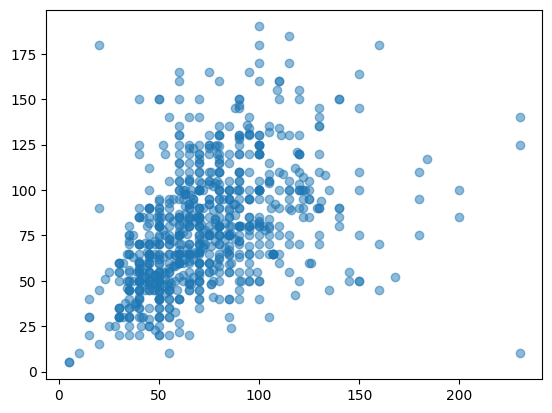

In [62]:
plt.scatter(x=df['Defense'], y=df['Attack'], alpha=0.5)

In [129]:
# quarda os dados para posteriormente fazer a inferência e não alterar o dataframe original
real_x = df['Defense']
min_x = df['Defense'].min()
max_x = df['Defense'].max()

real_y = df['Attack']
min_y = df['Attack'].min()
max_y = df['Attack'].max()


# cria um dataframe secundário apenas para os dado normalizados
df_norm = df[['Name', 'Attack', 'Defense']].copy()
df_norm['Defense'] = (real_x - min_x) / (max_x - min_x)
df_norm['Attack'] = (real_y - min_y) / (max_y - min_y)


# total de linhas que serão usadas no dataset de treino
N = 640


# separação do conjunto de dados
X_train = list(df_norm['Defense'][:N])
X_test = list(df_norm['Defense'][N:])

y_train = list(df_norm['Attack'][:N])
y_test = list(df_norm['Attack'][N:])


print('Dado normalizados:')
display(df_norm)

Dado normalizados:


,Name,Attack,Defense
0,Bulbasaur,0.237838,0.195556
1,Ivysaur,0.308108,0.257778
2,Venusaur,0.416216,0.346667
3,VenusaurMega Venusaur,0.513514,0.524444
4,Charmander,0.254054,0.168889
...,...,...,...
795,Diancie,0.513514,0.644444
796,DiancieMega Diancie,0.837838,0.466667
797,HoopaHoopa Confined,0.567568,0.244444
798,HoopaHoopa Unbound,0.837838,0.244444


In [133]:
# instancia o objeto neurônio
perceptron = Neuron(w=1, b=1, lr=0.1, N=N)

# lista que irá acumular os erros ao logo das épocas
errors = []

# treinamento em 50 épocas
for epoch in range(50):
    # faz append dos erros
    errors.append(perceptron.error)
    
    for i in range(N):
        x, y = X_train[i], y_train[i]

        # faz o forward
        perceptron.forward(x)

        # calcula o erro
        perceptron.MSE(y)

        # faz o backward
        perceptron.backward()

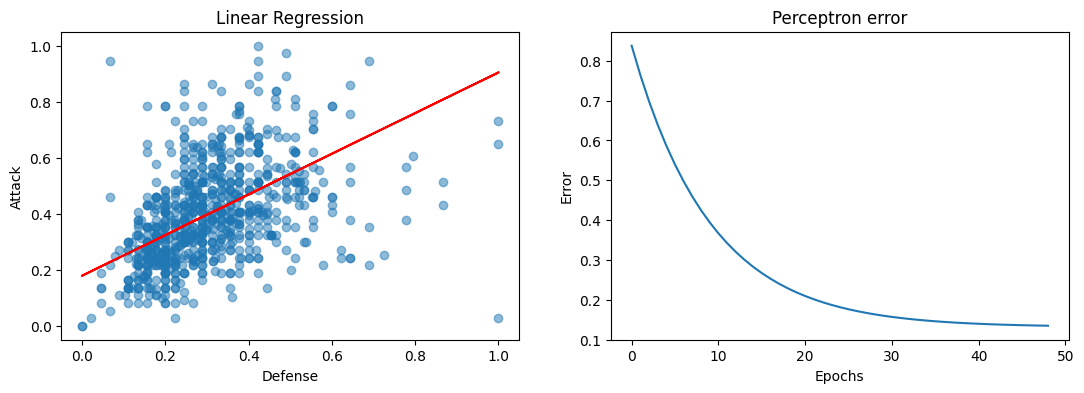

In [135]:
w, b = perceptron.w, perceptron.b

# Criar figura e eixos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# Adicionar plot de linha e scatter plot no primeiro eixo
ax1.plot(df_norm['Defense'], (df_norm['Defense'] * w + b), color='red')
ax1.scatter(x=df_norm['Defense'], y=df_norm['Attack'], alpha=0.5)

# Adicionar plot de linha no segundo eixo
ax2.plot(errors[1:])

# Adicionar títulos e legendas
ax1.set_title('Linear Regression')
ax1.set_xlabel('Defense')
ax1.set_ylabel('Attack')

ax2.set_title('Perceptron error')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Error')

# Mostrar gráfico
plt.show()

In [136]:
# entra com um dado
x = int(input('Digite uma defesa: '))


# normaliza o dado
x = (x - min_x) / (max_x - min_x)
pred = w * x + b

# desnormaliza o dado
x = int(x * (max_x - min_x) + min_x)
pred = round(pred * (max_y - min_y) + min_y)


print(f'Um pokémon com DEFEASA {x} tem um ATAQUE estimado em {pred}.\nDEF: {x}   -->   ATK: {pred}')

Um pokémon com DEFEASA 159 tem um ATAQUE estimado em 130.
DEF: 159   -->   ATK: 130
